<h1>Analyse the data on loan defaulters and identify more patterns, thus help the lending club to identify those kind of customer earlier in the process.<h1>

In [311]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [312]:
lending_df = pd.read_csv('loan.csv', low_memory=False)

In [313]:
lending_df.shape

(39717, 111)

<h1> Cleaning up columns and rows <h1>

In [4]:
#remove columns bc_open_to_buy, inq_fi, inq_last_12m, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_tl, 
#mort_acc, mths_since_last_major_derog, mths_since_rcnt_il, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq
#mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl,
#num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m,
#num_tl_op_past_12m, open_acc_6m, open_il_12m, open_il_24m, open_il_6m, open_rv_12m, open_rv_24m, pct_tl_nvr_dlq, 
#percent_bc_gt_75, tot_coll_amt, tot_cur_bal, tot_hi_cred_lim, total_bal_ex_mort, total_bal_il, total_bc_limit, total_cu_tl
#total_il_high_credit_limit

#remove % symbol with "int_rate", "revol_util" column

#split year, month, date for "issue_d" column - if need be

#remove months in "term"

#clean up emp_length in years i.e 0 = < 1 years, 10 = 10+ years. The value would range between 0 to 10.

#remove "na" and split year and month for "last_credit_pull_d" column

#contains "na": mths_since_last_delinq, mths_since_last_record, next_pymnt_d, pub_rec_bankruptcies, revol_util, title

In [314]:
lending_df.drop(columns=['bc_open_to_buy', 'inq_fi', 'inq_last_12m', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op','mo_sin_rcnt_tl', 
'mort_acc', 'mths_since_last_major_derog', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 
'percent_bc_gt_75', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl',
'total_il_high_credit_limit'], axis=1, inplace=True)

In [315]:
#removed columns which doesnt't have any data for all rows.
lending_df.shape

(39717, 68)

In [316]:
#remove % from 'int_rate' column
lending_df['int_rate'] = lending_df['int_rate'].apply(lambda x : float(x[:-1]))

In [317]:
#lending_df['revol_util'] removing null/blank rows
lending_df = lending_df[~lending_df['revol_util'].isnull()]

In [318]:
#verifying the blank rows are removed.
lending_df['revol_util'].isnull().sum()

0

In [319]:
#remove % from 'revol_util' column
lending_df['revol_util'] = lending_df['revol_util'].apply(lambda x : float(x[:-1]))

In [320]:
#remove text 'month' in 'term' column
lending_df['term'] = lending_df['term'].apply(lambda x : int(x.split( )[0]))

In [321]:
#verifying the shape and data size before proceeding further.
lending_df.shape

(39667, 68)

In [322]:
#remove loan status : current and we focus on defaulters and completed customers.
lending_df = lending_df[~(lending_df['loan_status'] == 'Current')]

In [323]:
lending_df.shape

(38527, 68)

<h1>Taking subset of loan data which represent defaulted loans.</h1>

In [324]:
lending_default_loans_df = lending_df[lending_df['loan_status'] == 'Charged Off']

In [325]:
lending_default_loans_df.shape

(5611, 68)

In [326]:
lending_default_loans_df = lending_default_loans_df[~lending_default_loans_df['emp_length'].isnull()]

In [327]:
lending_default_loans_df['emp_length'].isnull().sum()

0

In [328]:
#emp_length clean up:  0 = < 1 years, 10 = 10+ years. The value would range between 0 to 10.
def empLengthCleanup(x):
    if x == '< 1 year':
        return int(0)
    elif x == '10+ years':
        return int(10)
    else:
        return int(x.split( )[0])
    
lending_default_loans_df['emp_length'] = lending_default_loans_df['emp_length'].apply(lambda x : empLengthCleanup(x))

In [329]:
lending_df = lending_df[~lending_df['emp_length'].isnull()]

In [330]:
lending_df['emp_length'].describe()

count         37497
unique           11
top       10+ years
freq           8487
Name: emp_length, dtype: object

In [331]:
#emp_length clean up:  0 = < 1 years, 10 = 10+ years. The value would range between 0 to 10.
def empLengthCleanup(x):
    if x == '< 1 year':
        return int(0)
    elif x == '10+ years':
        return int(10)
    else:
        return int(x.split( )[0])
    
lending_df['emp_length'] = lending_df['emp_length'].apply(lambda x : empLengthCleanup(x))

<h2> Analysis 1 - Univariate (Segmented)</h2>

<h2>Column : revol_util<h2>
<h4>A) Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. Using corresponding column - revol_util<h4>
    
<h5>
Inference:
    
The histogram plot of revol_util column shows higher the percentage of credit utilization of borrower with existing accounts shows the stress on his business/finance thus he is more likely to default when he gets a loan.

Credit Utilization is on X-axis, trends along higher utilization shows higher account defaults.
    Analyse the loan amount and funded amount.
<h5>

In [332]:
#reassigning index after taking subset
lending_default_loans_df.reset_index(drop=True, inplace=True)

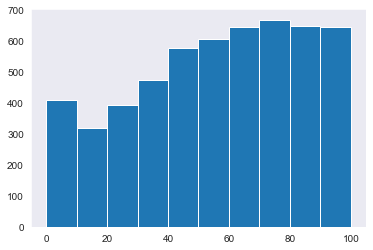

In [333]:

plt.hist(lending_default_loans_df['revol_util'], bins=10)
plt.show()

In [334]:
lending_default_loans_df['revol_util'].describe()

count    5384.000000
mean       55.750652
std        27.868937
min         0.000000
25%        34.700000
50%        58.700000
75%        79.200000
max        99.900000
Name: revol_util, dtype: float64

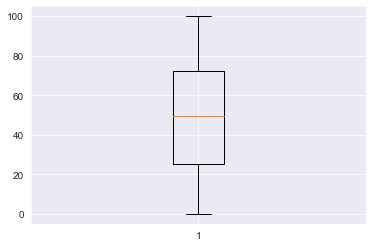

In [160]:
plt.boxplot(lending_df['revol_util'])
plt.show()

In [335]:
lending_default_loans_df['verification_status'].value_counts()

Not Verified       2042
Verified           1949
Source Verified    1393
Name: verification_status, dtype: int64

<h2>Column: verification_status<h2>
<h4>    
    Inference: The verification status on 'Charge off' subset data, reveals the information - 
        customers those are source verified have less chance of defaulting the loan
        theres a clear trend that being shown with below histogram
    As a whole, default loans not verified status contributes higher percentage.<h4>
<h5>
    Recommendation: Please have Source Verified for all customer who apply for loans this would reduce the bad loans and defaulters.<h5>

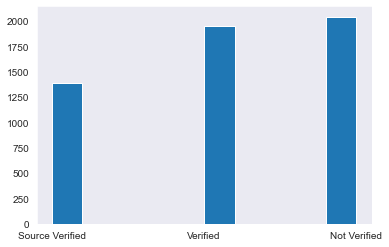

In [336]:
#by having proper source verification would help us in identifying bad borrowers and thus denying loans for them.
plt.hist(lending_default_loans_df['verification_status'])
plt.show()

<h2>Column: funded_amnt to analyse the range of amount that is maximum loan is given out.<h2>
    
<h4>The below graph shows the maximum loans given around 4000 to 10000 range<h4>

In [337]:
lending_df['funded_amnt'].describe()

count    37497.000000
mean     10861.260234
std       7096.151309
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

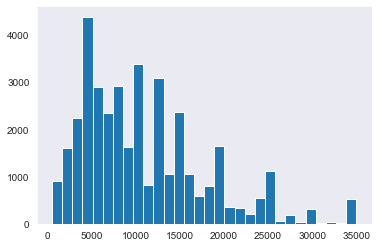

In [338]:
plt.hist(lending_df['funded_amnt'], bins=30)
plt.show()

<h2> Analysis 2 - Bivariate </h2>

<h5>Note: Here we would consider two columns of the given dataset and analyse the patterns for bad loans.<h5>

<h3>Here we consider:
    loan_status,
    pub_rec_bankruptcies<h3>

<h4>Inference: From the below plot we can infer: The customer have higher percentage of prior bankruptcies tend to default the loans. This can be considered as an important factor when giving out loans.<h4>

In [340]:
# set categorical order
lending_df['grade'] = pd.Categorical(lending_df['grade'],
                                   categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                                   ordered=True)


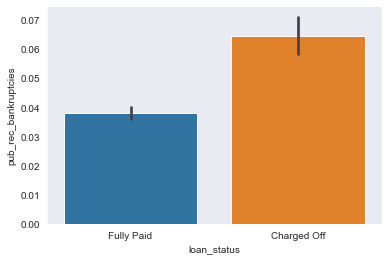

In [341]:
sns.barplot(x=lending_df['loan_status'], y=lending_df['pub_rec_bankruptcies'], data=lending_df)
plt.show()

In [342]:
lending_df['pub_rec_bankruptcies'].value_counts()

0.0    35266
1.0     1529
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [343]:
lending_df['dti'].isnull().sum()

0

<h2>Column: grade vs dti<h2>

<h4>This graph shows the Debt to Income ratio vs the Loan Grade.
    Generally, lower the dti ratio is better chance he can service the debt.<h4>

<h5>Inference: The customers those who have low dti value have high chance to serve their debt payments, hence they are better customers. 
    As we see for Fully Paid customer the average range remains low when compared to Charged Off customers.<h5>

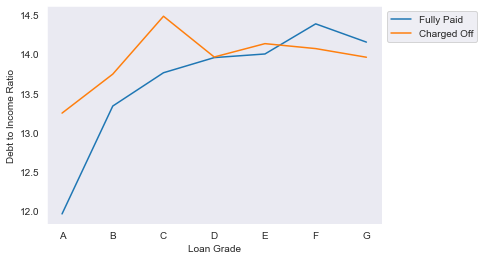

In [553]:
#line plot between dti(debt to income ratio) and grade (loan grade)
sns.set_style('dark', {"grid.color": ".0001", "grid.linestyle": "-"})
ax=sns.lineplot(x='grade', y='dti', data=lending_df, hue='loan_status', ci=None)
ax.set(xlabel='Loan Grade', ylabel='Debt to Income Ratio')

#place legend in center right of plot
#plt.legend(loc='upper right', title='Loan Status', bbox_to_anchor=(1, 1), ncol=1)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


In [345]:
lending_df['revol_util'].describe()

count    37497.000000
mean        48.861742
std         28.341493
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [346]:
# set categorical order
lending_default_loans_df['grade'] = pd.Categorical(lending_default_loans_df['grade'],
                                   categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                                   ordered=True)

In [347]:
lending_df_grouped_grade = lending_df.groupby('grade').count()

In [348]:
lending_default_loans_df_grouped_grade = lending_default_loans_df.groupby('grade').count()

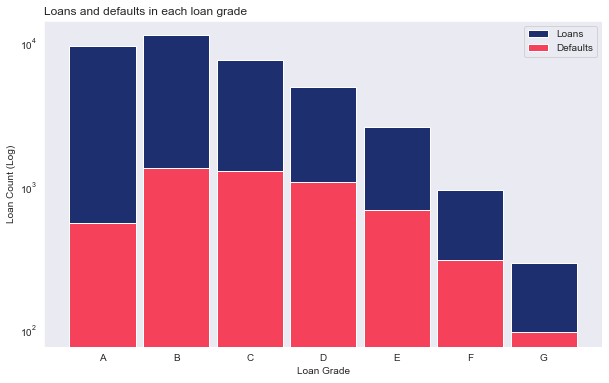

In [558]:
# # define figure
# fig, ax = plt.subplots(1, figsize=(10, 6))# numerical x
# x = np.arange(0, len(lending_df_grouped_grade.index))
# # plot bars
# plt.bar(x - 0, lending_df_grouped_grade['member_id'], width = 0.9, color = '#1D2F6F')
# plt.bar(x - 0, lending_default_loans_df_grouped_grade['member_id'], width = 0.9, color = '#f5425a')
# #lending_default_loans_df_grouped_grade.plot.line(x=lending_default_loans_df_grouped_grade['member_id'])

# # x y details
# plt.ylabel('Loan Count (Log)')
# plt.xlabel('Loan Grade')
# plt.xticks(x, lending_df_grouped_grade.index)
# plt.yscale('log')

# # title and legend
# plt.title('Loans and defaults in each loan grade', loc ='left')
# plt.legend(['Loans','Defaults'], loc='upper right', ncol = 1)

# plt.show()



<h1>Column: dti vs int_rate - Hue: Loan Status<h1>
    
<h4>Inference: The sweet spot is lower dti and low interest rates where the number of defaulters are very low.
    When the interest rate goes up customer tend to default more<h4>
<h4>This plot shows we have less number of loan applicants in lower interest percentage and more customers on higher interest bracket.<h4>

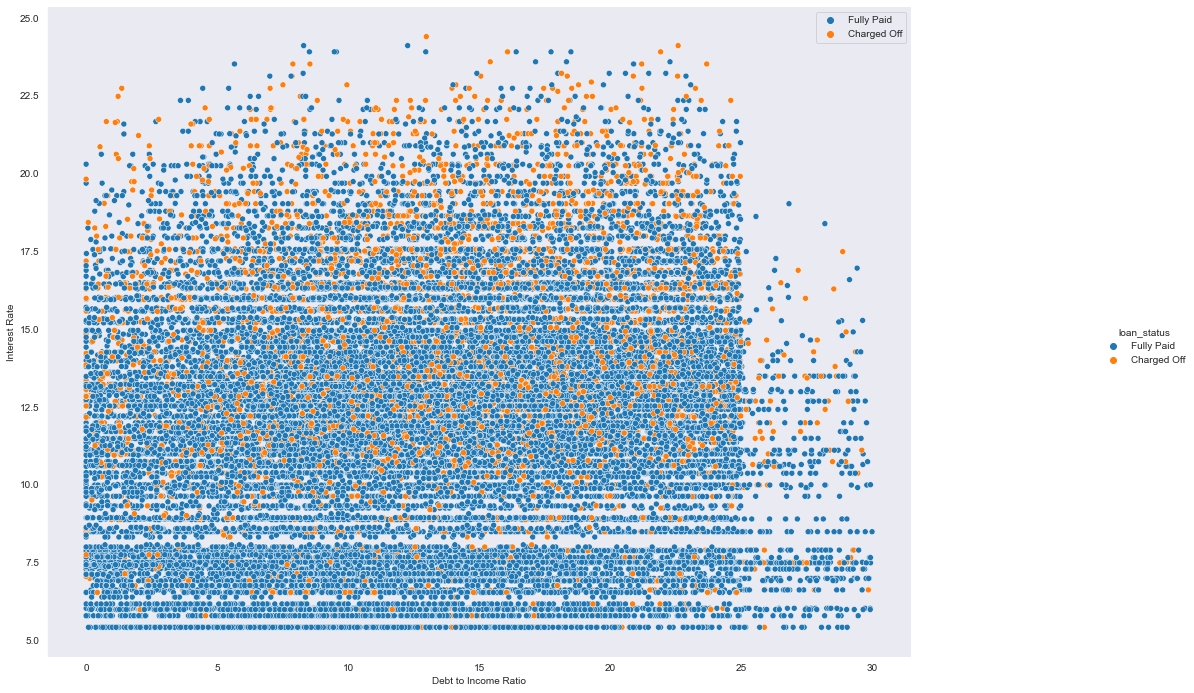

In [453]:
color_dict = dict({'Fully Paid':'green',
                  'Charged Off':'red'})

g = sns.relplot(x="dti", y='int_rate', hue='loan_status', data=lending_df, 
                #palette=color_dict, 
                kind='scatter')
#g.set(xscale='log')
#plt.legend(['Fully Paid','Charged Off'], loc='upper right', ncol = 1)
g.figure.set_size_inches(18.5, 10.5)
g.set_xlabels('Debt to Income Ratio')
g.set_ylabels('Interest Rate')
g.fig.get_axes()[0].legend(loc='upper right')
#leg = g._legend
#leg.set_bbox_to_anchor([1, 0.7])  # coordinates of lower left of bounding box
#leg._loc = 1  # if required you can set the loc
plt.show()

<h1>Column: annual_inc vs funded_amnt - Hue: Loan Status<h1>
    
<h4>Inference: Lending Club is doing a good job by loaning out money to customers based on the annual income, that is significantly visible in the below plot. For lower annual income customers the funded amount invested is low and for higher annual income customers more loan amount is invested. <h4>
    
<h6>Note: Outlier clean up is done in this dataset under consideration based on very high annual income customers<h6>

In [563]:
lending_df['annual_inc'].describe()

count    3.749700e+04
mean     6.943653e+04
std      6.467208e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [567]:
lending_df.shape

(37497, 68)

In [569]:
lending_df_cap_annual_income = lending_df[lending_df['annual_inc'] < 84000]

In [570]:
lending_df_cap_annual_income.shape

(28231, 68)

<AxesSubplot:xlabel='annual_inc'>

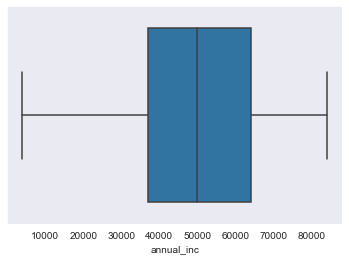

In [571]:
sns.boxplot(x='annual_inc', data=lending_df_cap_annual_income)

<AxesSubplot:xlabel='annual_inc'>

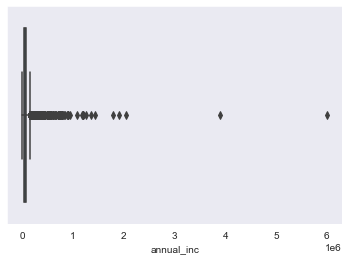

In [564]:
sns.boxplot(x='annual_inc', data=lending_df)

In [565]:
lending_df['annual_inc'].value_counts()

60000.00      1434
50000.00      1008
40000.00       838
45000.00       791
75000.00       779
30000.00       772
65000.00       771
70000.00       704
48000.00       673
80000.00       627
55000.00       626
42000.00       576
36000.00       575
90000.00       541
100000.00      495
35000.00       494
120000.00      477
85000.00       465
72000.00       460
52000.00       379
24000.00       369
54000.00       351
110000.00      303
95000.00       272
62000.00       258
78000.00       240
38000.00       234
25000.00       230
150000.00      222
32000.00       211
58000.00       209
130000.00      208
96000.00       202
56000.00       200
125000.00      199
43000.00       199
105000.00      195
68000.00       192
66000.00       190
53000.00       187
63000.00       185
57000.00       179
51000.00       178
33000.00       177
84000.00       176
37000.00       170
140000.00      160
47000.00       157
44000.00       156
115000.00      146
46000.00       145
38400.00       143
39000.00    

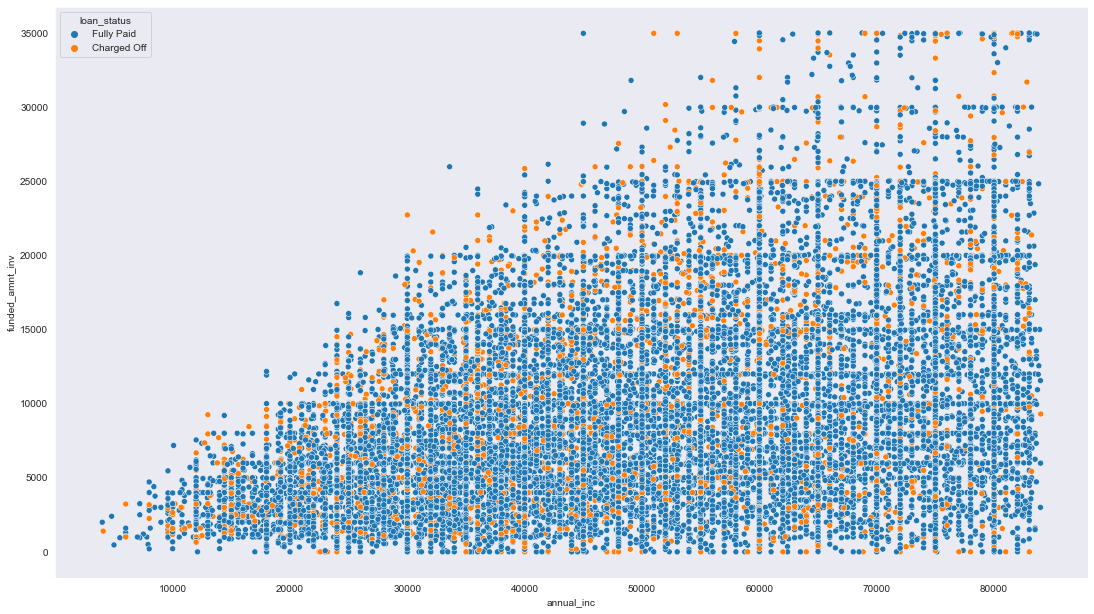

In [577]:

x = sns.scatterplot(x='annual_inc', y='funded_amnt_inv', 
                    data=lending_df_cap_annual_income, 
                    hue='loan_status')
#x.set(xscale='log')
#x.set(yscale='log')
x.figure.set_size_inches(18.5, 10.5)
plt.show()

<h1>Column: emp_length vs annual income - Hue: Loan Status<h1>

<h4>Inference: The customers who has more/higher annual income in their employment year bracket tends to default less 
    or better customers to give out loan.<h4>

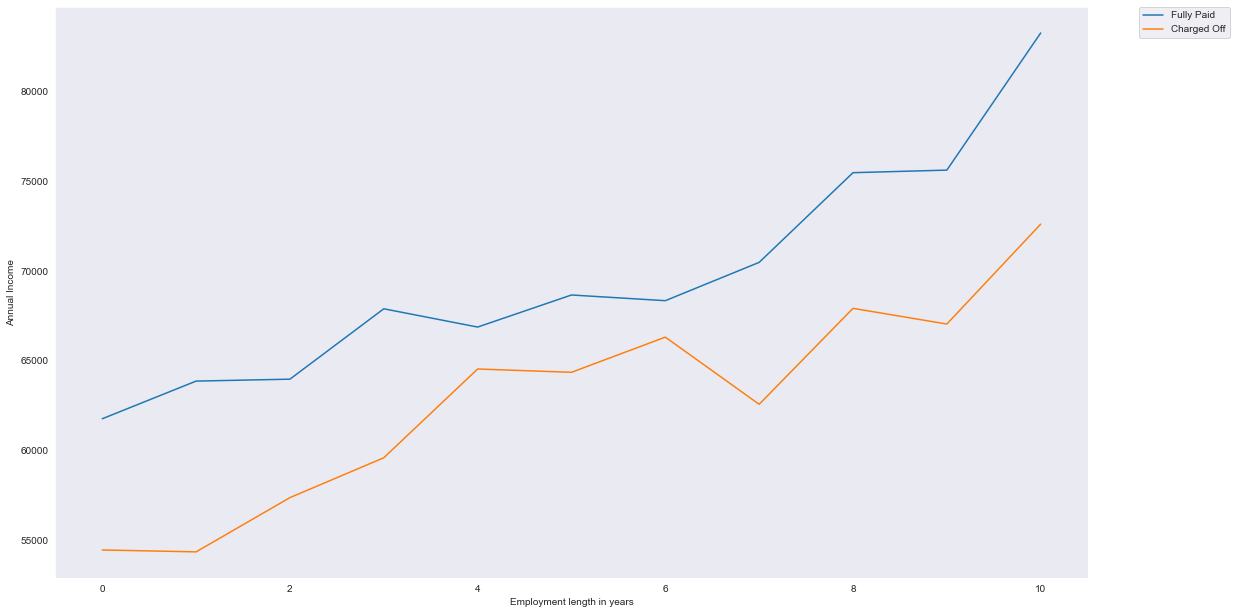

In [464]:
x = sns.lineplot(x='emp_length', y='annual_inc', data=lending_df, hue='loan_status', ci=None)
#x.set(yscale='log')
x.set_xlabel('Employment length in years')
x.set_ylabel('Annual Income')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
x.figure.set_size_inches(18.5, 10.5)
plt.show()

In [477]:
lending_df_grouped_purpose = lending_df.groupby('purpose').count()
lending_default_loans_df_grouped_purpose = lending_default_loans_df.groupby('purpose').count()

<h1>Analysis: Loan Purpose and defaults in each category<h1>

<h4>Inference: The loan category: 'Debt Consolidation', 'Other', 'Credit Card' are major contributors in the loan book portfolio. If renewable energy sector is something lending club is looking at, it looks promising/sun-rising sector as defaults are very low in this sector.<h4>

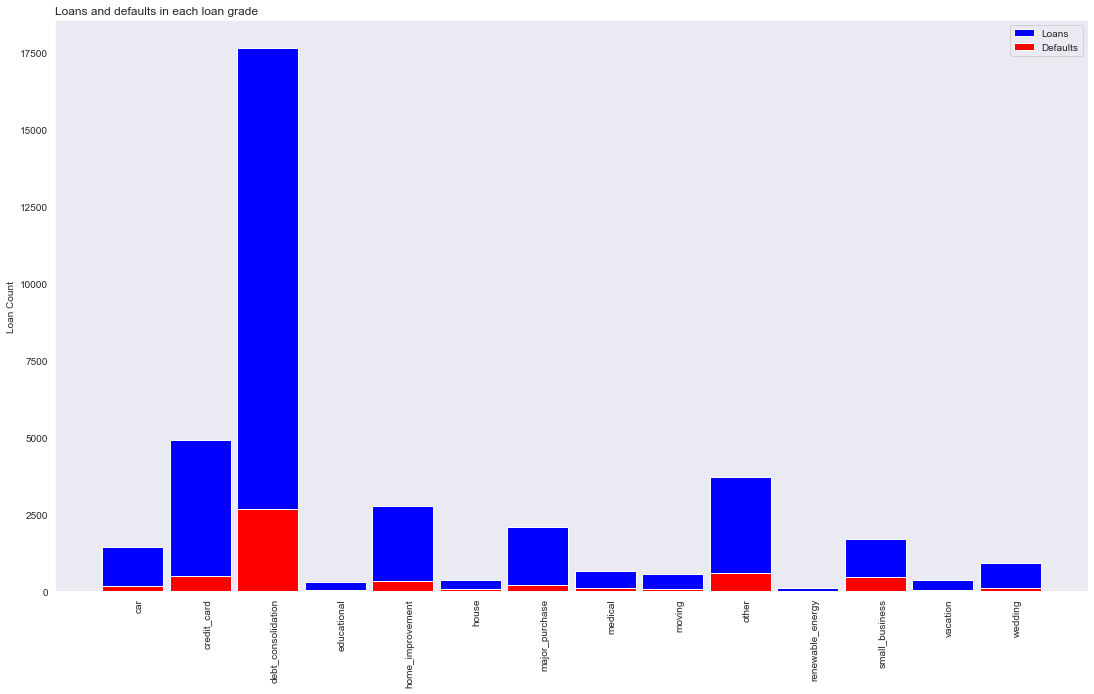

In [592]:
# define figure
fig, ax = plt.subplots(1, figsize=(10, 6))
x = np.arange(0, len(lending_df_grouped_purpose.index))
# plot bars
plt.bar(x - 0.1, lending_df_grouped_purpose['member_id'], width = 0.9, color = '#0000FF')
plt.bar(x - 0.1, lending_default_loans_df_grouped_purpose['member_id'], width = 0.9, color = '#FF0000')

# x y details
plt.ylabel('Loan Count')
plt.xticks(x, lending_df_grouped_purpose.index, rotation='vertical')
#plt.yscale('log')
fig.set_size_inches(18.5, 10.5)


# title and legend
plt.title('Loans and defaults in each loan grade', loc ='left')
plt.legend(['Loans','Defaults'], loc='upper right', ncol = 1)

plt.show()



<h1>Derived Metrics<h1>
    
<h3>Create a new metric - <h3>

<h3>loan_days (difference between 'issue_d' and 'last_pymnt_d')<h3>
<h3>loan_year - this signifies the loan days in terms of year<h3>

<h2>This metric would help us in knowing the defaults happening in which year/day range 
    after taking the loan<h2>

In [484]:
lending_default_loans_df['issue_d'].isnull().sum()

0

In [485]:
lending_default_loans_df['last_pymnt_d'].isnull().sum()

62

In [494]:
lending_df['issue_d'].isnull().sum()

0

In [495]:
lending_df['last_pymnt_d'].isnull().sum()

62

In [496]:
lending_df_valid_dates = lending_df[~lending_df['last_pymnt_d'].isnull()]

In [513]:
def daysToDefault(issueDate, lastPaymentDate):
    issueDate_1 = '01-'+issueDate;
    lastPaymentDate_1 = '01-'+lastPaymentDate;
    
    issueDate_1 = issueDate_1[:-2]+'20'+issueDate_1[-2:]
    lastPaymentDate_1 = lastPaymentDate_1[:-2]+'20'+lastPaymentDate_1[-2:]
    
    daysToReturn = pd.to_datetime(lastPaymentDate_1) - pd.to_datetime(issueDate_1)
    
    return daysToReturn.days
    

lending_df_valid_dates['loan_days'] = lending_df_valid_dates.apply(
    lambda x : daysToDefault(x['issue_d'], x['last_pymnt_d']), axis=1)

C:\Users\BALAKU~1\AppData\Local\Temp/ipykernel_14516/286820862.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lending_df_valid_dates['loan_days'] = lending_df_valid_dates.apply(


In [514]:
lending_df_valid_dates['loan_days'].value_counts()

1096    5555
1127    2831
1126    2094
731      564
1035     501
1095     469
1826     459
1124     444
943      442
1065     437
1004     422
670      398
792      367
823      356
884      355
639      342
700      340
578      336
974      329
366      317
762      309
609      308
1857     307
427      295
365      293
761      288
882      281
396      281
61       269
853      259
335      251
304      240
1157     239
488      234
305      232
912      230
517      221
153      219
457      215
1066     213
122      212
92       208
458      204
274      204
608      204
915      203
547      202
701      201
1827     199
397      194
519      189
945      186
243      185
212      184
487      181
244      180
669      174
273      171
822      170
973      165
213      164
851      162
854      161
334      158
31       154
640      153
214      152
426      152
518      150
913      147
821      145
548      142
184      141
1461     140
275      138
1005     137
580      135

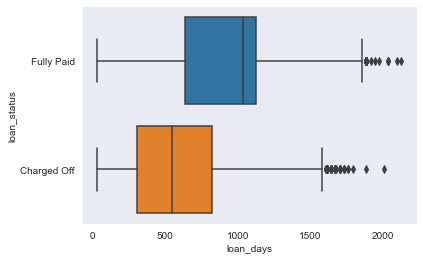

In [515]:
ax = sns.boxplot(x='loan_days', y='loan_status', data=lending_df_valid_dates)

In [532]:
def yearCalc(number_of_days):
    # Assume that years is
    # of 365 days
    DAYS_IN_WEEK = 7;
    year = int(number_of_days / 365)
    week = int((number_of_days % 365) /
                DAYS_IN_WEEK)
    days = (number_of_days % 365) % DAYS_IN_WEEK
    
    return int(year)


lending_df_valid_dates['loan_year'] = lending_df_valid_dates.apply(
    lambda x : yearCalc(x['loan_days']), axis=1)

C:\Users\BALAKU~1\AppData\Local\Temp/ipykernel_14516/731833167.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lending_df_valid_dates['loan_year'] = lending_df_valid_dates.apply(


In [534]:
lending_df_valid_dates['loan_year'].value_counts()

3    13153
2     8563
1     7858
0     5242
4     1377
5     1242
Name: loan_year, dtype: int64

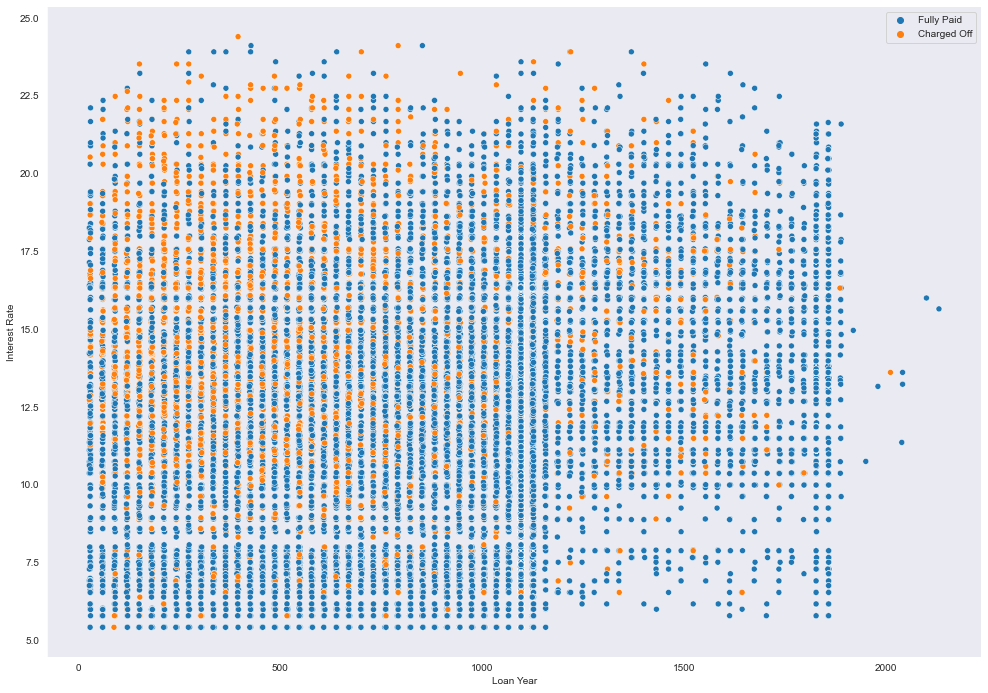

In [587]:
g = sns.relplot(x="loan_days", y='int_rate', hue='loan_status', 
                data=lending_df_valid_dates,  
                kind='scatter', ci=None)
#g.set(xscale='log')
#plt.legend(['Fully Paid','Charged Off'], loc='upper right', ncol = 1)
g.figure.set_size_inches(20, 10.5)
g.set_xlabels('Loan Days')
g.set_ylabels('Interest Rate')
g.legend.remove()
g.fig.get_axes()[0].legend(loc='upper right')
#leg = g._legend
#leg.set_bbox_to_anchor([1, 0.7])  # coordinates of lower left of bounding box
#leg._loc = 1  # if required you can set the loc
#g.set(xticks=[i for i in range(0, max(lending_df_valid_dates['loan_days']) + 100, 100)])


plt.show()

Text(0, 0.5, 'Loan Count')

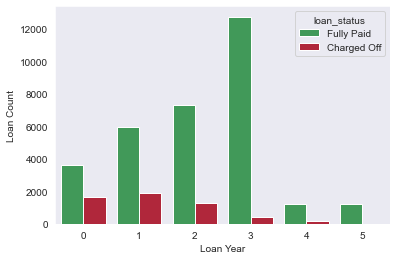

In [594]:
loan_year_cnt_plot = sns.countplot(x='loan_year', data=lending_df_valid_dates, hue='loan_status', palette=['#32a852',"#c7102b"])
loan_year_cnt_plot.set_xlabel('Loan Year')
loan_year_cnt_plot.set_ylabel('Loan Count')
#loan_year_cnt_plot.set_yscale('log')

In [ ]:
#g = sns.relplot(x="loan_year", y='int_rate', hue='loan_status', 
#                data=lending_df_valid_dates,  
#                kind='line', ci=None)
#g.set(xscale='log')
#plt.legend(['Fully Paid','Charged Off'], loc='upper right', ncol = 1)
#g.figure.set_size_inches(20, 10.5)
#g.set_xlabels('Loan Year')
#g.set_ylabels('Interest Rate')
#g.legend.remove()
#g.fig.get_axes()[0].legend(loc='upper right')
#leg = g._legend
#leg.set_bbox_to_anchor([1, 0.7])  # coordinates of lower left of bounding box
#leg._loc = 1  # if required you can set the loc
#g.set(xticks=[i for i in range(0, max(lending_df_valid_dates['loan_days']) + 100, 100)])


#plt.show()